In [189]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()

import warnings
warnings.filterwarnings('ignore')

In [190]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv',index_col=0)
df.head(100)

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
Date                                                                     
2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   
2008-12-06   Albury     14.6     29.7       0.2          NaN       NaN   
2008-12-07   Albury     14.3     25.0       0.0          NaN       NaN   
2008-12-08   Albury      7.7     26.7       0.0          NaN       NaN   
2008-12-09   Albury      9.7     31.9       0.0          NaN       NaN   
2008-12-10   Albury     13.1     30.1       1.4          NaN       NaN   
2008-12-11   Albury     13.4     30.4       0.0          NaN       NaN   
2008-12-12   Albury     15.9     21.7       2.2          NaN       NaN   
2008-12-13   Albury     15.9     18.6      15.6          NaN       NaN   
2008-12-14   Albury     12.6     21.0       3.6          NaN       NaN   
2008-12-15   Albury      8.4     24.6       0.0          NaN       NaN   
2008-12-16   Albury      9.8     27.7       NaN          NaN       NaN   
2008-12-17   Albury     14.1     20.9       0.0          NaN       NaN   
2008-12-18   Albury     13.5     22.9      16.8          NaN       NaN   
2008-12-19   Albury     11.2     22.5      10.6          NaN       NaN   
2008-12-20   Albury      9.8     25.6       0.0          NaN       NaN   
2008-12-21   Albury     11.5     29.3       0.0          NaN       NaN   
2008-12-22   Albury     17.1     33.0       0.0          NaN       NaN   
2008-12-23   Albury     20.5     31.8       0.0          NaN       NaN   
2008-12-24   Albury     15.3     30.9       0.0          NaN       NaN   
2008-12-25   Albury     12.6     32.4       0.0          NaN       NaN   
2008-12-26   Albury     16.2     33.9       0.0          NaN       NaN   
2008-12-27   Albury     16.9     33.0       0.0          NaN       NaN   
2008-12-28   Albury     20.1     32.7       0.0          NaN       NaN   
2008-12-29   Albury     19.7     27.2       0.0          NaN       NaN   
2008-12-30   Albury     12.5     24.2       1.2          NaN       NaN   
2008-12-31   Albury     12.0     24.4       0.8          NaN       NaN   
2009-01-01   Albury     11.3     26.5       0.0          NaN       NaN   
2009-01-02   Albury      9.6     23.9       0.0          NaN       NaN   
2009-01-03   Albury     10.5     28.8       0.0          NaN       NaN   
2009-01-04   Albury     12.3     34.6       0.0          NaN       NaN   
2009-01-05   Albury     12.9     35.8       0.0          NaN       NaN   
2009-01-06   Albury     13.7     37.9       0.0          NaN       NaN   
2009-01-07   Albury     16.1     38.9       0.0          NaN       NaN   
2009-01-08   Albury     14.0     28.3       0.0          NaN       NaN   
2009-01-09   Albury     12.5     28.4       0.0          NaN       NaN   
2009-01-10   Albury     17.0     30.8       0.0          NaN       NaN   
2009-01-11   Albury     16.9     32.0       0.0          NaN       NaN   
2009-01-12   Albury     17.3     34.7       0.0          NaN       NaN   
2009-01-13   Albury     17.2     37.7       0.0          NaN       NaN   
2009-01-14   Albury     17.4     43.0       0.0          NaN       NaN   
2009-01-15   Albury     19.8     32.7       0.0          NaN       NaN   
2009-01-16   Albury     14.9     26.7       0.0          NaN       NaN   
2009-01-17   Albury     10.5     28.4       0.0          NaN       NaN   
2009-01-18   Albury     11.3     32.2       0.0          NaN       NaN   
2009-01-19   Albury     13.9     36.6       0.0          NaN       NaN   
2009-01-20   Albury     18.6     39.9       0.0          NaN       NaN   
2009-01-21   Albury     19.3     38.1       0.8          NaN       NaN   
2009-01-22   Al

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8425 entries, 2008-12-01 to 2017-06-25
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       8425 non-null   object 
 1   MinTemp        8350 non-null   float64
 2   MaxTemp        8365 non-null   float64
 3   Rainfall       8185 non-null   float64
 4   Evaporation    4913 non-null   float64
 5   Sunshine       4431 non-null   float64
 6   WindGustDir    7434 non-null   object 
 7   WindGustSpeed  7434 non-null   float64
 8   WindDir9am     7596 non-null   object 
 9   WindDir3pm     8117 non-null   object 
 10  WindSpeed9am   8349 non-null   float64
 11  WindSpeed3pm   8318 non-null   float64
 12  Humidity9am    8366 non-null   float64
 13  Humidity3pm    8323 non-null   float64
 14  Pressure9am    7116 non-null   float64
 15  Pressure3pm    7113 non-null   float64
 16  Cloud9am       6004 non-null   float64
 17  Cloud3pm       5970 non-null   float64
 18

In [192]:
df.Location.value_counts()

Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64

In [193]:
df1=lab_enc.fit_transform(df['Location'])
df['Location']=df1

In [194]:
df.WindGustDir.value_counts()

N      713
SSE    578
S      577
SW     572
E      557
WNW    531
W      507
WSW    504
SE     484
ENE    415
SSW    396
NW     383
NE     353
NNE    343
ESE    302
NNW    219
Name: WindGustDir, dtype: int64

In [195]:
df1=lab_enc.fit_transform(df['WindGustDir'])
df['WindGustDir']=df1

In [196]:
df.WindDir9am.value_counts()

N      906
SW     704
NW     625
WSW    543
SE     505
WNW    480
SSW    467
ENE    433
NNE    430
W      414
NE     409
S      402
E      380
SSE    365
NNW    280
ESE    253
Name: WindDir9am, dtype: int64

In [197]:
df1=lab_enc.fit_transform(df['WindDir9am'])
df['WindDir9am']=df1

In [198]:
df.WindDir3pm.value_counts()

SE     813
S      742
SSE    623
WSW    580
NE     544
N      524
SW     494
WNW    487
NW     468
W      462
ESE    462
E      460
ENE    417
SSW    370
NNE    365
NNW    306
Name: WindDir3pm, dtype: int64

In [199]:
df1=lab_enc.fit_transform(df['WindDir3pm'])
df['WindDir3pm']=df1

In [200]:
df.RainToday.value_counts( )

No     6195
Yes    1990
Name: RainToday, dtype: int64

In [201]:
df1=lab_enc.fit_transform(df['RainToday'])
df['RainToday']=df1

In [202]:
df.RainTomorrow.value_counts()

No     6195
Yes    1991
Name: RainTomorrow, dtype: int64

In [203]:
df1=lab_enc.fit_transform(df['RainTomorrow'])
df['RainTomorrow']=df1

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8425 entries, 2008-12-01 to 2017-06-25
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       8425 non-null   int32  
 1   MinTemp        8350 non-null   float64
 2   MaxTemp        8365 non-null   float64
 3   Rainfall       8185 non-null   float64
 4   Evaporation    4913 non-null   float64
 5   Sunshine       4431 non-null   float64
 6   WindGustDir    8425 non-null   int32  
 7   WindGustSpeed  7434 non-null   float64
 8   WindDir9am     8425 non-null   int32  
 9   WindDir3pm     8425 non-null   int32  
 10  WindSpeed9am   8349 non-null   float64
 11  WindSpeed3pm   8318 non-null   float64
 12  Humidity9am    8366 non-null   float64
 13  Humidity3pm    8323 non-null   float64
 14  Pressure9am    7116 non-null   float64
 15  Pressure3pm    7113 non-null   float64
 16  Cloud9am       6004 non-null   float64
 17  Cloud3pm       5970 non-null   float64
 18

In [205]:
df.describe()

Location      MinTemp      MaxTemp     Rainfall  Evaporation  \
count  8425.000000  8350.000000  8365.000000  8185.000000  4913.000000   
mean      5.793591    13.193305    23.859976     2.805913     5.389395   
std       3.162654     5.403596     6.136408    10.459379     5.044484   
min       0.000000    -2.000000     8.200000     0.000000     0.000000   
25%       3.000000     9.200000    19.300000     0.000000     2.600000   
50%       6.000000    13.300000    23.300000     0.000000     4.600000   
75%       8.000000    17.400000    28.000000     1.000000     7.000000   
max      11.000000    28.500000    45.500000   371.000000   145.000000   

          Sunshine  WindGustDir  WindGustSpeed   WindDir9am   WindDir3pm  ...  \
count  4431.000000  8425.000000    7434.000000  8425.000000  8425.000000  ...   
mean      7.632205     8.746944      40.174469     8.546588     8.066350  ...   
std       3.896235     5.172665      14.665721     5.012591     4.686287  ...   
min       0.000000     0.000000       7.000000     0.000000     0.000000  ...   
25%       4.750000     4.000000      30.000000     4.000000     4.000000  ...   
50%       8.700000     9.000000      39.000000     9.000000     8.000000  ...   
75%      10.700000    13.000000      50.000000    13.000000    12.000000  ...   
max      13.900000    16.000000     107.000000    16.000000    16.000000  ...   

       Humidity9am  Humidity3pm  Pressure9am  Pressure3pm     Cloud9am  \
count  8366.000000  8323.000000  7116.000000  7113.000000  6004.000000   
mean     67.822496    51.249790  1017.640233  1015.236075     4.566622   
std      16.833283    18.423774     6.828699     6.766681     2.877658   
min      10.000000     6.000000   989.800000   982.900000     0.000000   
25%      56.000000    39.000000  1013.000000  1010.400000     1.000000   
50%      68.000000    51.000000  1017.700000  1015.300000     5.000000   
75%      80.000000    63.000000  1022.300000  1019.800000     7.000000   
max     100.000000    99.000000  1039.000000  1036.000000     8.000000   

          Cloud3pm      Temp9am      Temp3pm    RainToday  RainTomorrow  
count  5970.000000  8369.000000  8329.000000  8425.000000   8425.000000  
mean      4.503183    17.762015    22.442934     0.293175      0.293056  
std       2.731659     5.627035     5.980020     0.514031      0.513752  
min       0.000000     1.900000     7.300000     0.000000      0.000000  
25%       2.000000    13.800000    18.000000     0.000000      0.000000  
50%       5.000000    17.800000    21.900000     0.000000      0.000000  
75%       7.000000    21.900000    26.400000     1.000000      1.000000  
max       8.000000    39.400000    44.100000     2.000000      2.000000  

[8 rows x 22 columns]

In [206]:
mode_value1=df['MinTemp'].mode()
df['MinTemp'].fillna(value=mode_value1, inplace=True)
df['MinTemp'].isnull().sum()
mode_value1

0    12.0
dtype: float64

In [207]:
df['MinTemp'].fillna(value=12, inplace=True)
df['MinTemp'].isnull().sum()

0

In [208]:
mode_value1=df['MaxTemp'].mode()
df['MaxTemp'].fillna(value=mode_value1, inplace=True)
#df['MaxTemp'].isnull().sum()
mode_value1

0    19.0
dtype: float64

In [209]:
df['MaxTemp'].fillna(value=19, inplace=True)
df['MaxTemp'].isnull().sum()

0

In [210]:
mean_value1=df['Rainfall'].mode()

#df['Rainfall'].isnull().sum()
mean_value1

0    0.0
dtype: float64

In [211]:
df['Rainfall'].fillna(value=0.0, inplace=True)

In [212]:
mode_value1=df['Evaporation'].mode()
df['Evaporation'].fillna(value=mode_value1, inplace=True)
#df['Evaporation'].isnull().sum()
mode_value1

0    4.0
dtype: float64

In [26]:
df['Evaporation'].fillna(value=4.0, inplace=True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8425 entries, 2008-12-01 to 2017-06-25
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       8425 non-null   int32  
 1   MinTemp        8425 non-null   float64
 2   MaxTemp        8425 non-null   float64
 3   Rainfall       8425 non-null   float64
 4   Evaporation    8425 non-null   float64
 5   Sunshine       8425 non-null   float64
 6   WindGustDir    8425 non-null   int32  
 7   WindGustSpeed  8425 non-null   float64
 8   WindDir9am     8425 non-null   int32  
 9   WindDir3pm     8425 non-null   int32  
 10  WindSpeed9am   8349 non-null   float64
 11  WindSpeed3pm   8318 non-null   float64
 12  Humidity9am    8366 non-null   float64
 13  Humidity3pm    8323 non-null   float64
 14  Pressure9am    7116 non-null   float64
 15  Pressure3pm    7113 non-null   float64
 16  Cloud9am       6004 non-null   float64
 17  Cloud3pm       5970 non-null   float64
 18

In [29]:
mean_value1=df['Sunshine'].mode()
#df['Sunshine'].fillna(value=mode_value1, inplace=True)
#df['Evaporation'].isnull().sum()
mean_value1

0    0.0
dtype: float64

In [30]:
df['Sunshine'].fillna(value=0.0, inplace=True)

In [63]:
df.Sunshine.value_counts()

0.0     166
11.1     68
11.2     67
11.0     66
10.7     64
       ... 
2.5       8
13.6      7
13.8      4
13.9      3
13.5      2
Name: Sunshine, Length: 140, dtype: int64

In [32]:
df.WindGustSpeed.value_counts()

39.0     441
35.0     435
37.0     422
33.0     408
31.0     396
41.0     371
30.0     367
28.0     332
43.0     302
48.0     292
26.0     275
50.0     259
46.0     258
24.0     255
52.0     249
44.0     241
22.0     223
54.0     210
20.0     186
56.0     153
57.0     148
19.0     137
61.0     114
59.0     113
63.0      95
17.0      92
65.0      74
67.0      64
72.0      62
15.0      58
13.0      57
74.0      54
70.0      53
69.0      49
76.0      44
78.0      23
80.0      22
11.0      18
85.0      14
81.0      13
91.0      12
93.0       7
89.0       7
83.0       6
9.0        6
98.0       4
94.0       3
87.0       3
7.0        2
102.0      2
100.0      2
107.0      1
Name: WindGustSpeed, dtype: int64

In [34]:
mode_value1=df['WindGustSpeed'].mode()
mode_value1

0    39.0
dtype: float64

In [35]:
df['WindGustSpeed'].fillna(value=39.0, inplace=True)

In [37]:
df.WindSpeed9am.value_counts()

9.0     803
0.0     752
13.0    708
4.0     610
11.0    607
7.0     572
6.0     515
17.0    481
15.0    467
19.0    430
20.0    427
24.0    312
22.0    279
2.0     258
28.0    229
26.0    208
31.0    153
30.0    114
35.0     77
33.0     70
37.0     58
41.0     49
39.0     35
44.0     29
43.0     28
46.0     26
52.0     16
50.0     10
56.0      8
54.0      6
48.0      6
61.0      2
57.0      2
63.0      2
Name: WindSpeed9am, dtype: int64

In [38]:
mode_value1=df['WindSpeed9am'].mode()
mode_value1

0    9.0
dtype: float64

In [39]:
df['WindSpeed9am'].fillna(value=9.0, inplace=True)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8425 entries, 2008-12-01 to 2017-06-25
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       8425 non-null   int32  
 1   MinTemp        8425 non-null   float64
 2   MaxTemp        8425 non-null   float64
 3   Rainfall       8425 non-null   float64
 4   Evaporation    8425 non-null   float64
 5   Sunshine       8425 non-null   float64
 6   WindGustDir    8425 non-null   int32  
 7   WindGustSpeed  8425 non-null   float64
 8   WindDir9am     8425 non-null   int32  
 9   WindDir3pm     8425 non-null   int32  
 10  WindSpeed9am   8425 non-null   float64
 11  WindSpeed3pm   8425 non-null   float64
 12  Humidity9am    8425 non-null   float64
 13  Humidity3pm    8425 non-null   float64
 14  Pressure9am    8425 non-null   float64
 15  Pressure3pm    7113 non-null   float64
 16  Cloud9am       6004 non-null   float64
 17  Cloud3pm       5970 non-null   float64
 18

In [41]:
mode_value1=df['WindSpeed3pm'].mode()
mode_value1

0    9.0
dtype: float64

In [42]:
df['WindSpeed3pm'].fillna(value=9.0, inplace=True)

In [44]:
mode_value1=df['Humidity9am'].mode()
mode_value1

0    73.0
dtype: float64

In [45]:
df['Humidity9am'].fillna(value=73.0, inplace=True)

In [47]:
mode_value1=df['Humidity3pm'].mode()
mode_value1

0    55.0
dtype: float64

In [48]:
df['Humidity3pm'].fillna(value=55.0, inplace=True)

In [50]:
mode_value1=df['Pressure9am'].mode()
mode_value1

0    1014.8
dtype: float64

In [51]:
df['Pressure9am'].fillna(value=1014.8, inplace=True)

In [53]:
mode_value1=df['Pressure3pm'].mode()
mode_value1

0    1017.8
dtype: float64

In [54]:
df['Pressure3pm'].fillna(value=1017.8, inplace=True)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8425 entries, 2008-12-01 to 2017-06-25
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       8425 non-null   int32  
 1   MinTemp        8425 non-null   float64
 2   MaxTemp        8425 non-null   float64
 3   Rainfall       8425 non-null   float64
 4   Evaporation    8425 non-null   float64
 5   Sunshine       8425 non-null   float64
 6   WindGustDir    8425 non-null   int32  
 7   WindGustSpeed  8425 non-null   float64
 8   WindDir9am     8425 non-null   int32  
 9   WindDir3pm     8425 non-null   int32  
 10  WindSpeed9am   8425 non-null   float64
 11  WindSpeed3pm   8425 non-null   float64
 12  Humidity9am    8425 non-null   float64
 13  Humidity3pm    8425 non-null   float64
 14  Pressure9am    8425 non-null   float64
 15  Pressure3pm    8425 non-null   float64
 16  Cloud9am       6004 non-null   float64
 17  Cloud3pm       5970 non-null   float64
 18

In [56]:
mode_value1=df['Cloud9am'].mode()
mode_value1

0    7.0
dtype: float64

In [64]:
df['Cloud9am'].fillna(value=7.0, inplace=True)

In [57]:
mode_value1=df['Cloud3pm'].mode()
mode_value1

0    7.0
dtype: float64

In [58]:
df['Cloud3pm'].fillna(value=7.0, inplace=True)

In [59]:
mode_value1=df['Temp9am'].mode()
mode_value1

0    14.8
dtype: float64

In [60]:
df['Temp9am'].fillna(value=14.8, inplace=True)

In [61]:
mode_value1=df['Temp3pm'].mode()
mode_value1

0    19.2
dtype: float64

In [62]:
df['Temp3pm'].fillna(value=19.2, inplace=True)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8425 entries, 2008-12-01 to 2017-06-25
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       8425 non-null   int32  
 1   MinTemp        8425 non-null   float64
 2   MaxTemp        8425 non-null   float64
 3   Rainfall       8425 non-null   float64
 4   Evaporation    8425 non-null   float64
 5   Sunshine       8425 non-null   float64
 6   WindGustDir    8425 non-null   int32  
 7   WindGustSpeed  8425 non-null   float64
 8   WindDir9am     8425 non-null   int32  
 9   WindDir3pm     8425 non-null   int32  
 10  WindSpeed9am   8425 non-null   float64
 11  WindSpeed3pm   8425 non-null   float64
 12  Humidity9am    8425 non-null   float64
 13  Humidity3pm    8425 non-null   float64
 14  Pressure9am    8425 non-null   float64
 15  Pressure3pm    8425 non-null   float64
 16  Cloud9am       8425 non-null   float64
 17  Cloud3pm       8425 non-null   float64
 18

In [75]:
df.RainTomorrow.value_counts()

0    6195
1    1991
2     239
Name: RainTomorrow, dtype: int64

In [66]:
from sklearn.feature_selection import SelectKBest, f_classif

In [76]:
df['RainTomorrow']=df['RainTomorrow'].replace({'Yes':1,'No':0})

In [80]:
X=df.drop('RainTomorrow',axis=1)
y=df['RainTomorrow']

In [81]:
best_features=SelectKBest(score_func=f_classif, k=17)
fit=best_features.fit(X,y)

df_scores=pd.DataFrame(fit.scores_)#as we kknow this will be done through ANOVA , taht score I am going to get

df_columns=pd.DataFrame(X.columns)

feature_scores=pd.concat([df_columns,df_scores],axis=1)

feature_scores.columns=['Features_Name','Score']#name output columns

print(feature_scores.nlargest(17,'Score'))

    Features_Name        Score
13    Humidity3pm  1066.192362
20      RainToday   989.776130
17       Cloud3pm   353.148698
12    Humidity9am   350.790035
16       Cloud9am   276.776859
3        Rainfall   216.674783
5        Sunshine   186.707100
7   WindGustSpeed   179.380440
19        Temp3pm   162.777241
14    Pressure9am   133.092650
15    Pressure3pm    98.931887
2         MaxTemp    98.416268
1         MinTemp    49.502023
10   WindSpeed9am    25.448253
4     Evaporation    17.801132
11   WindSpeed3pm    16.214780
6     WindGustDir    11.808507


In [82]:
new_X=df[['Humidity3pm','RainToday','Cloud3pm','Humidity9am','Cloud9am',
          'Rainfall','Sunshine','WindGustSpeed','Temp3pm','Pressure9am',
          'Pressure3pm','MaxTemp','MinTemp','WindSpeed9am','Evaporation',
          'WindSpeed3pm','WindGustDir']]

In [83]:
scalar=StandardScaler()
X_scalar=scalar.fit_transform(new_X)

In [84]:
from time import time

x_train,x_test,y_train,y_test=train_test_split(X_scalar,y,test_size=0.25, random_state=355)

knn=KNeighborsClassifier()

start=time()
knn.fit(x_train,y_train)
print("Knn Training time",(time()-start))

start=time()
y_pred=knn.predict(x_test)
print("Knn Test time",(time()-start))


Knn Training time 0.0019998550415039062
Knn Test time 0.524118185043335


In [85]:
cfm=confusion_matrix(y_test,y_pred)
cfm

array([[1457,   92,    7],
       [ 236,  261,    4],
       [  22,    7,   21]], dtype=int64)

In [86]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      1556
           1       0.72      0.52      0.61       501
           2       0.66      0.42      0.51        50

    accuracy                           0.83      2107
   macro avg       0.74      0.63      0.67      2107
weighted avg       0.82      0.83      0.81      2107



In [87]:
from sklearn.model_selection import KFold,cross_val_score

k_f=KFold(n_splits=3,shuffle=True)

k_f

KFold(n_splits=3, random_state=None, shuffle=True)

In [88]:
for train,test in k_f.split([1,2,3,4,5,6,7,8,9,10]):
    print('train',train,'test',test)


train [0 1 3 7 8 9] test [2 4 5 6]
train [0 2 4 5 6 7 9] test [1 3 8]
train [1 2 3 4 5 6 8] test [0 7 9]


In [89]:
cross_val_score(knn,X_scalar,y,cv=10)

array([0.79715302, 0.78647687, 0.76275208, 0.82206406, 0.83985765,
       0.8064133 , 0.80285036, 0.78859857, 0.83135392, 0.83135392])

In [90]:
cross_val_score(KNeighborsClassifier(),X_scalar,y,cv=5).mean()

0.7895548961424332

In [91]:
from sklearn.model_selection import GridSearchCV

In [92]:
param_grid={'algorithm':['kd_tree','brute'],
            'leaf_size':[3,5,6,7,8],
            'n_neighbors':[3,5,7,9,11,13]
}

In [93]:
gridsearch=GridSearchCV(estimator=knn,param_grid=param_grid)

In [94]:
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [3, 5, 6, 7, 8],
                         'n_neighbors': [3, 5, 7, 9, 11, 13]})

In [95]:
gridsearch.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 3, 'n_neighbors': 13}

In [96]:
knn = KNeighborsClassifier(algorithm ='kd_tree',leaf_size=3,n_neighbors=13)

In [97]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=3, n_neighbors=13)

In [98]:
y_pred=knn.predict(x_test)

In [100]:
cfm=confusion_matrix(y_test,y_pred)
cfm

array([[1478,   73,    5],
       [ 271,  224,    6],
       [  22,   10,   18]], dtype=int64)

In [101]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      1556
           1       0.73      0.45      0.55       501
           2       0.62      0.36      0.46        50

    accuracy                           0.82      2107
   macro avg       0.73      0.59      0.63      2107
weighted avg       0.80      0.82      0.80      2107



In [104]:
from sklearn.linear_model import LinearRegression

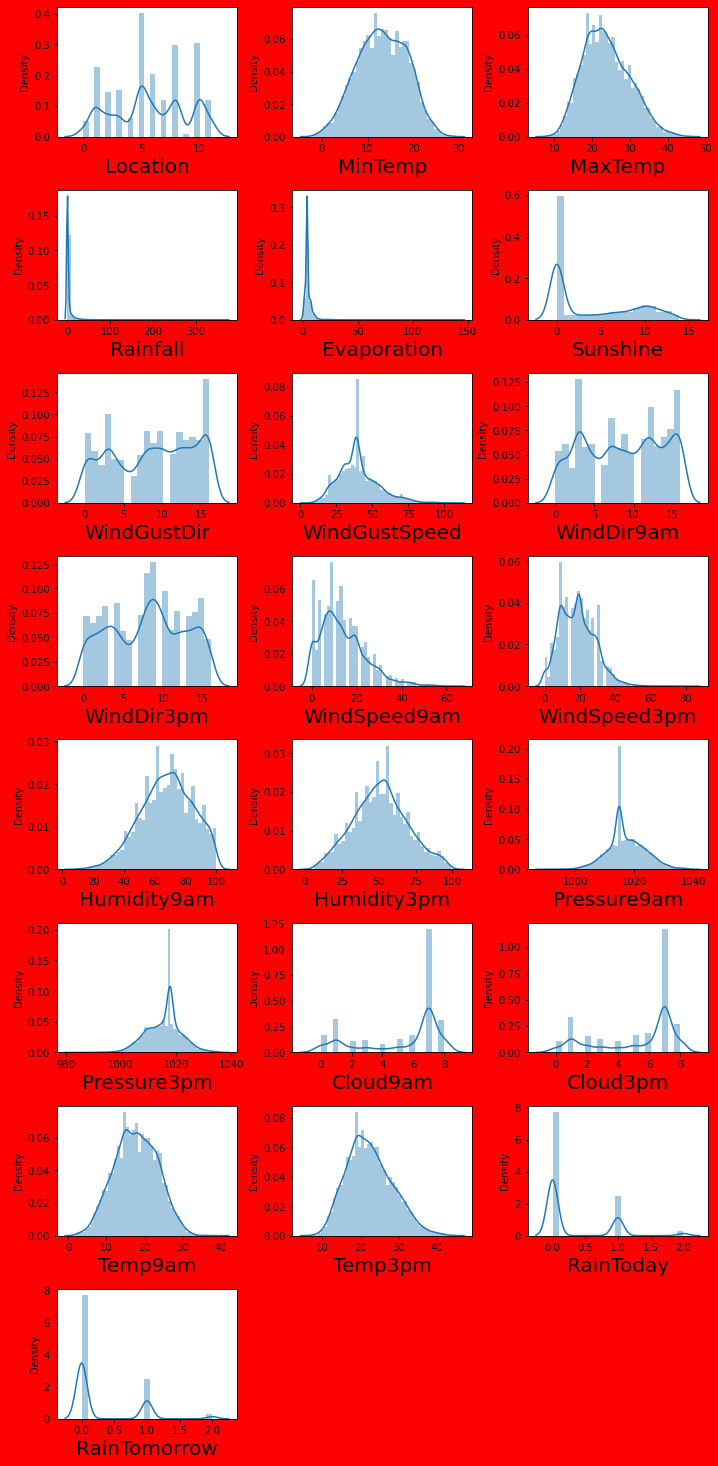

In [109]:
plt.figure(figsize=(10,25), facecolor='red')
plotnumber = 1

for column in df:
    if plotnumber<=22:
        ax=plt.subplot(10,3,plotnumber)#Print in 2 rows and 4 columns plotnumer = position
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [110]:
u = df['Rainfall']
V= df.drop(columns = ['Rainfall'])

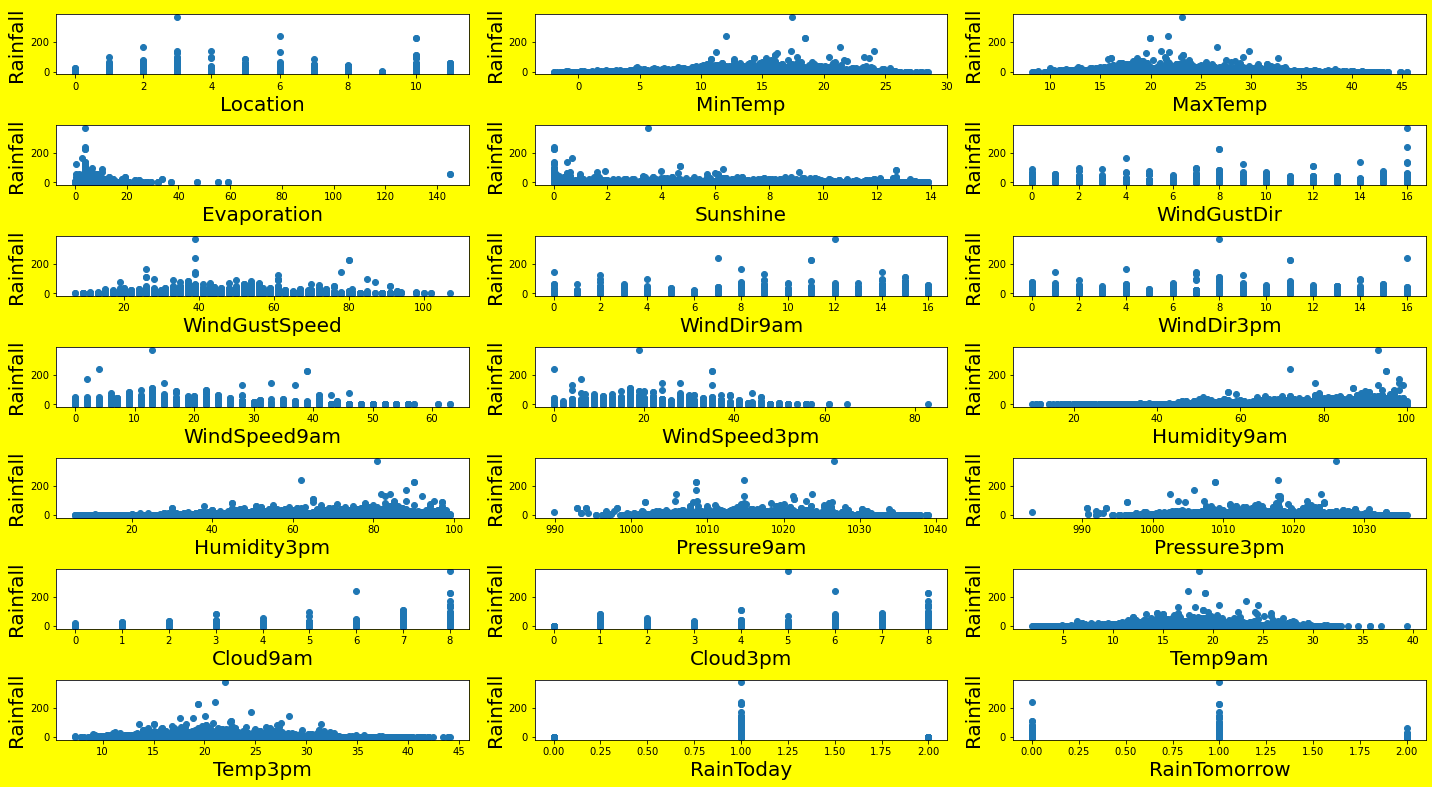

In [112]:
#Lets visualize the dataset and analyze the data
plt.figure(figsize=(20,15), facecolor='yellow')
plotnumber = 1

for column in V:
    if plotnumber<=22:
        ax=plt.subplot(10,3,plotnumber)#Print in 2 rows and 4 columns plotnumer = position
        plt.scatter(V[column],u)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Rainfall',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [113]:
scaler=StandardScaler()#instantiate inot object
V_scaled=scaler.fit_transform(V)

In [156]:
best_features=SelectKBest(score_func=f_classif, k=11)
fit=best_features.fit(V,u)

df_scores=pd.DataFrame(fit.scores_)#as we kknow this will be done through ANOVA , taht score I am going to get

df_columns=pd.DataFrame(V.columns)

feature_scores=pd.concat([df_columns,df_scores],axis=1)

feature_scores.columns=['Features_Name','Score']#name output columns

print(feature_scores.nlargest(11,'Score'))

   Features_Name      Score
19     RainToday        inf
3    Evaporation  18.014949
20  RainTomorrow  11.385226
11   Humidity9am   8.959817
12   Humidity3pm   8.287616
18       Temp3pm   3.616105
15      Cloud9am   3.395542
2        MaxTemp   3.380694
16      Cloud3pm   2.865854
13   Pressure9am   2.567614
7     WindDir9am   2.349123


In [157]:
new_V=df[['RainToday','Evaporation','RainTomorrow','Humidity9am',
          'Humidity3pm','Temp3pm','Cloud9am','MaxTemp','Cloud3pm',
         'Pressure9am','WindDir9am','WindGustDir','Sunshine','Pressure9am','WindDir9am']]

In [158]:
scaler=StandardScaler()#instantiate inot object
V_scaled=scaler.fit_transform(new_V)

In [159]:
x_train,x_test,y_train,y_test=train_test_split(V_scaled,u,test_size=0.25,random_state=49)   #feature then label and random state is kept for just checking the randomness
y_train.head()

Date
2014-12-04    10.8
2009-08-07     0.8
2014-06-14     0.8
2009-11-01     4.6
2010-11-09     0.0
Name: Rainfall, dtype: float64

In [160]:
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [161]:
new_V

RainToday  Evaporation  RainTomorrow  Humidity9am  Humidity3pm  \
Date                                                                         
2008-12-01          0          4.0             0         71.0         22.0   
2008-12-02          0          4.0             0         44.0         25.0   
2008-12-03          0          4.0             0         38.0         30.0   
2008-12-04          0          4.0             0         45.0         16.0   
2008-12-05          0          4.0             0         82.0         33.0   
2008-12-06          0          4.0             0         55.0         23.0   
2008-12-07          0          4.0             0         49.0         19.0   
2008-12-08          0          4.0             0         48.0         19.0   
2008-12-09          0          4.0             1         42.0          9.0   
2008-12-10          1          4.0             0         58.0         27.0   
2008-12-11          0          4.0             1         48.0         22.0   
2008-12-12          1          4.0             1         89.0         91.0   
2008-12-13          1          4.0             1         76.0         93.0   
2008-12-14          1          4.0             0         65.0         43.0   
2008-12-15          0          4.0             2         57.0         32.0   
2008-12-16          2          4.0             0         50.0         28.0   
2008-12-17          0          4.0             1         69.0         82.0   
2008-12-18          1          4.0             1         80.0         65.0   
2008-12-19          1          4.0             0         47.0         32.0   
2008-12-20          0          4.0             0         45.0         26.0   
2008-12-21          0          4.0             0         56.0         28.0   
2008-12-22          0          4.0             0         38.0         28.0   
2008-12-23          0          4.0             0         54.0         24.0   
2008-12-24          0          4.0             0         55.0         23.0   
2008-12-25          0          4.0             0         49.0         17.0   
2008-12-26          0          4.0             0         45.0         19.0   
2008-12-27          0          4.0             0         41.0         28.0   
2008-12-28          0          4.0             0         56.0         15.0   
2008-12-29          0          4.0             1         49.0         22.0   
2008-12-30          1          4.0             0         78.0         70.0   
2008-12-31          0          4.0             0         48.0         28.0   
2009-01-01          0          4.0             0         46.0         26.0   
2009-01-02          0          4.0             0         44.0         22.0   
2009-01-03          0          4.0             0         43.0         22.0   
2009-01-04          0          4.0             0         41.0         12.0   
2009-01-05          0          4.0             0         41.0          9.0   
2009-01-06          0          4.0             0         33.0          8.0   
2009-01-07          0          4.0             0         34.0         12.0   
2009-01-08          0          4.0             0         43.0         15.0   
2009-01-09          0          4.0             0         38.0         16.0   
2009-01-10          0          4.0             0         36.0         24.0   
2009-01-11          0          4.0             0         52.0         31.0   
2009-01-12          0          4.0             0         48.0         16.0   
2009-01-13          0          4.0             0         51.0         19.0   
2009-01-14          0          4.0             0         40.0          8.0   
2009-01-15          0          4.0             0         34.0         28.0   
2009-01-16          0          4.0             0         46.0         20.0   
2009-01-17          0          4.0             0         35.0         16.0   
2009-01-18          0          4.0             0         34.0         17.0   
2009-01-19          0          4.0

In [162]:
print('Rainfall',regression.predict(scaler.transform([[0,4.0,0,71.0,22.0,21.8,8.0,22.9,7.0,1007.7,13,13,0.0,1007.7,13]])))

Rainfall [-0.77430768]


In [163]:
u

Date
2008-12-01      0.600000
2008-12-02      0.000000
2008-12-03      0.000000
2008-12-04      0.000000
2008-12-05      1.000000
2008-12-06      0.200000
2008-12-07      0.000000
2008-12-08      0.000000
2008-12-09      0.000000
2008-12-10      1.400000
2008-12-11      0.000000
2008-12-12      2.200000
2008-12-13     15.600000
2008-12-14      3.600000
2008-12-15      0.000000
2008-12-16      2.805913
2008-12-17      0.000000
2008-12-18     16.800000
2008-12-19     10.600000
2008-12-20      0.000000
2008-12-21      0.000000
2008-12-22      0.000000
2008-12-23      0.000000
2008-12-24      0.000000
2008-12-25      0.000000
2008-12-26      0.000000
2008-12-27      0.000000
2008-12-28      0.000000
2008-12-29      0.000000
2008-12-30      1.200000
2008-12-31      0.800000
2009-01-01      0.000000
2009-01-02      0.000000
2009-01-03      0.000000
2009-01-04      0.000000
2009-01-05      0.000000
2009-01-06      0.000000
2009-01-07      0.000000
2009-01-08      0.000000
2009-01-09      0.00